# (Optional) Colab Setup
If you aren't using Colab, you can delete the following code cell. This is just to help students with mounting to Google Drive to access the other .py files and downloading the data, which is a little trickier on Colab than on your local machine using Jupyter.

In [83]:
# you will be prompted with a window asking to grant permissions
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
# fill in the path in your Google Drive in the string below. Note: do not escape slashes or spaces
import os
datadir = "/content/drive/MyDrive/CS444/assignment1/"
# if not os.path.exists(datadir):
#   !ln -s "/drive/MyDrive/CS444/assignment1/" $datadir
os.chdir(datadir)
!pwd

/content/drive/MyDrive/CS444/assignment1


In [85]:
# downloading Fashion-MNIST
import os
os.chdir(os.path.join(datadir,"fashion-mnist/"))
!chmod +x ./get_data.sh
!./get_data.sh
os.chdir(datadir)

--2024-02-13 16:38:50--  https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/t10k-images-idx3-ubyte.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4422102 (4.2M) [application/octet-stream]
Saving to: ‘t10k-images-idx3-ubyte.gz.17’

t10k-images-idx3-ub 100%[===================>]   4.22M  --.-KB/s    in 0.08s   

2024-02-13 16:38:51 (51.5 MB/s) - ‘t10k-images-idx3-ubyte.gz.17’ saved [4422102/4422102]

--2024-02-13 16:38:51--  https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/t10k-labels-idx1-ubyte.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.

# Imports

In [86]:
import random
import numpy as np
from data_process import get_FASHION_data, get_RICE_data
from scipy.spatial import distance
from models import Perceptron, SVM, Softmax, Logistic
from kaggle_submission import output_submission_csv
%matplotlib inline

# For auto-reloading external modules
# See http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Loading Fashion-MNIST

In the following cells we determine the number of images for each split and load the images.
<br />
TRAIN_IMAGES + VAL_IMAGES = (0, 60000]
, TEST_IMAGES = 10000

In [87]:
# You can change these numbers for experimentation
# For submission we will use the default values
TRAIN_IMAGES = 50000
VAL_IMAGES = 10000
normalize = True

In [88]:
data = get_FASHION_data(TRAIN_IMAGES, VAL_IMAGES, normalize=normalize)
X_train_fashion, y_train_fashion = data['X_train'], data['y_train']
X_val_fashion, y_val_fashion = data['X_val'], data['y_val']
X_test_fashion, y_test_fashion = data['X_test'], data['y_test']
n_class_fashion = len(np.unique(y_test_fashion))

# Loading Rice

In [89]:
# loads train / test / val splits of 80%, 20%, 20%
data = get_RICE_data()
X_train_RICE, y_train_RICE = data['X_train'], data['y_train']
X_val_RICE, y_val_RICE = data['X_val'], data['y_val']
X_test_RICE, y_test_RICE = data['X_test'], data['y_test']
n_class_RICE = len(np.unique(y_test_RICE))

print("Number of train samples: ", X_train_RICE.shape[0])
print("Number of val samples: ", X_val_RICE.shape[0])
print("Number of test samples: ", X_test_RICE.shape[0])

Number of train samples:  10911
Number of val samples:  3637
Number of test samples:  3637


### Get Accuracy

This function computes how well your model performs using accuracy as a metric.

In [90]:
def get_acc(pred, y_test):
    return np.sum(y_test == pred) / len(y_test) * 100

# Perceptron

Perceptron has 2 hyperparameters that you can experiment with:
### Learning rate
The learning rate controls how much we change the current weights of the classifier during each update. We set it at a default value of 0.5, but you should experiment with different values. Here is a guide to help you find a right learning rate:
- Try values ranging from 5.0 to 0.0005 to see the impact on model accuracy.
- If the accuracy fluctuates a lot or diverges, the learning rate is too high. Try decreasing it by a factor of 10 (e.g. from 0.5 to 0.05).
- If the accuracy is changing very slowly, the learning rate may be too low. Try increasing it by a factor of 10.
- You can also try adding a learning rate decay to slowly reduce the learning rate over each training epoch. For example, multiply the learning rate by 0.95 after each epoch.
- Plot training and validation accuracy over epochs for different learning rates. This will help you visualize the impact of the learning rate.
- [Here](https://towardsdatascience.com/https-medium-com-dashingaditya-rakhecha-understanding-learning-rate-dd5da26bb6de) is a detailed guide to learning rate.

### Number of Epochs
An epoch is a complete iterative pass over all of the data in the dataset. During an epoch we predict a label using the classifier and then update the weights of the classifier according to the perceptron update rule for each sample in the training set. You should try different values for the number of training epochs and report your results.

You will implement the Perceptron classifier in the **models/perceptron.py**

The following code:
- Creates an instance of the Perceptron classifier class
- The train function of the Perceptron class is trained on the training data
- We use the predict function to find the training accuracy as well as the testing accuracy


## Train Perceptron on Fashion-MNIST

In [93]:
### Best
lr = 0.005
n_epochs = 100

### experiment
import matplotlib.pyplot as plt

x = np.linspace(1, n_epochs, n_epochs)
y = np.zeros(n_epochs)

percept_fashion = Perceptron(n_class_fashion, lr, 1)
for epoch in range(n_epochs):
  print("training epoch {}:".format(epoch))
  percept_fashion.train(X_train_fashion, y_train_fashion)
  pred_percept = percept_fashion.predict(X_val_fashion)
  print('The validation accuracy is: %f' % (get_acc(pred_percept, y_val_fashion)))
  y[epoch] = get_acc(pred_percept, y_val_fashion)
  # if y[epoch] > 82:
  #   break

plt.plot(x, y, 'r-.p')
plt.show()

training epoch 0:
The training accuracy is 77.806
The validation accuracy is: 77.120000
training epoch 1:
The training accuracy is 79.032
The validation accuracy is: 77.950000
training epoch 2:
The training accuracy is 79.822
The validation accuracy is: 79.010000
training epoch 3:
The training accuracy is 80.684
The validation accuracy is: 78.990000
training epoch 4:
The training accuracy is 81.554
The validation accuracy is: 80.490000
training epoch 5:
The training accuracy is 80.166
The validation accuracy is: 77.860000
training epoch 6:
The training accuracy is 80.138
The validation accuracy is: 78.590000
training epoch 7:
The training accuracy is 81.992
The validation accuracy is: 79.880000
training epoch 8:
The training accuracy is 82.098
The validation accuracy is: 80.430000
training epoch 9:
The training accuracy is 81.492
The validation accuracy is: 79.440000
training epoch 10:
The training accuracy is 81.146
The validation accuracy is: 78.790000
training epoch 11:
The training

KeyboardInterrupt: 

In [ ]:
opt_epoches = np.argmax(y)
opt_acc = np.max(y)
print("optimal n_epoches =", opt_epoches)
print("optimal valid accuracy =", opt_acc)

training epoch 0:
The training accuracy is 77.63600000000001
The validation accuracy is: 77.130000
training epoch 1:
The training accuracy is 79.702
The validation accuracy is: 78.610000
training epoch 2:
The training accuracy is 80.808
The validation accuracy is: 79.480000
training epoch 3:
The training accuracy is 79.30199999999999
The validation accuracy is: 77.710000
training epoch 4:
The training accuracy is 80.25999999999999
The validation accuracy is: 78.540000
training epoch 5:
The training accuracy is 82.91
The validation accuracy is: 80.680000
training epoch 6:
The training accuracy is 80.84599999999999
The validation accuracy is: 78.580000
training epoch 7:
The training accuracy is 81.426
The validation accuracy is: 79.190000
training epoch 8:
The training accuracy is 83.45
The validation accuracy is: 81.220000
training epoch 9:
The training accuracy is 83.128
The validation accuracy is: 81.030000
training epoch 10:
The training accuracy is 81.5
The validation accuracy is: 7

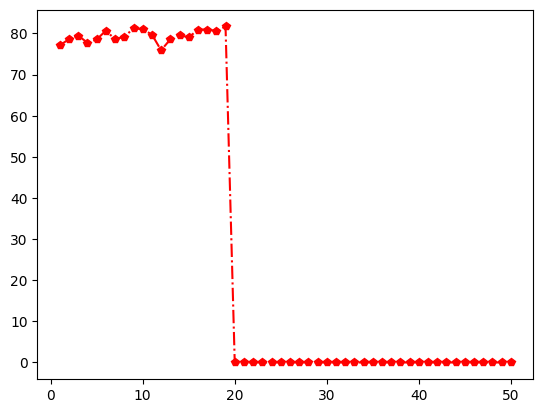

In [ ]:
### Output Optimal
percept_fashion = Perceptron(n_class_fashion, lr, opt_epoches)
percept_fashion.train(X_train_fashion, y_train_fashion)

In [19]:
pred_percept = percept_fashion.predict(X_train_fashion)
print('The training accuracy is given by: %f' % (get_acc(pred_percept, y_train_fashion)))

The training accuracy is given by: 84.734000


### Validate Perceptron on Fashion-MNIST

In [20]:
pred_percept = percept_fashion.predict(X_val_fashion)
print('The validation accuracy is given by: %f' % (get_acc(pred_percept, y_val_fashion)))

The validation accuracy is given by: 82.530000


### Test Perceptron on Fashion-MNIST

In [21]:
pred_percept = percept_fashion.predict(X_test_fashion)
print('The testing accuracy is given by: %f' % (get_acc(pred_percept, y_test_fashion)))

The testing accuracy is given by: 81.820000


### Perceptron_Fashion-MNIST Kaggle Submission

Once you are satisfied with your solution and test accuracy, output a file to submit your test set predictions to the Kaggle for Assignment 1 Fashion-MNIST. Use the following code to do so:

In [22]:
output_submission_csv('kaggle/perceptron_submission_fashion.csv', percept_fashion.predict(X_test_fashion))

## Train Perceptron on Rice

In [ ]:
w = np.random.random(3)
x = np.array([3, 2, 1])
print(w @ x)

0.8806198952980718


In [ ]:
lr = 0.000001
n_epochs = 7

percept_RICE = Perceptron(n_class_RICE, lr, n_epochs)
percept_RICE.train(X_train_RICE, y_train_RICE)    ### !!! y_train_RICE in {0, 1} form
# print(y_train_RICE)

The training accuracy of epoch 0 is 58.50059572908074
The training accuracy of epoch 1 is 98.13949225552196
The training accuracy of epoch 2 is 94.9042250939419
The training accuracy of epoch 3 is 98.62524058289799
The training accuracy of epoch 4 is 99.6333974887728
The training accuracy of epoch 5 is 99.56924204930803
The training accuracy of epoch 6 is 99.01017321968656


In [ ]:
pred_percept = percept_RICE.predict(X_train_RICE)
print('The training accuracy is given by: %f' % (get_acc(pred_percept, y_train_RICE)))

The training accuracy is given by: 99.010173


### Validate Perceptron on Rice

In [ ]:
pred_percept = percept_RICE.predict(X_val_RICE)
print('The validation accuracy is given by: %f' % (get_acc(pred_percept, y_val_RICE)))    ### !!! y_val_RICE in {0, 1} form

The validation accuracy is given by: 99.230135


### Test Perceptron on Rice

In [ ]:
pred_percept = percept_RICE.predict(X_test_RICE)
print('The testing accuracy is given by: %f' % (get_acc(pred_percept, y_test_RICE)))

The testing accuracy is given by: 98.955183


# Support Vector Machines (with SGD)

Next, you will implement a "soft margin" SVM. In this formulation you will maximize the margin between positive and negative training examples and penalize margin violations using a hinge loss.

We will optimize the SVM loss using SGD. This means you must compute the loss function with respect to model weights. You will use this gradient to update the model weights.

SVM optimized with SGD has 3 hyperparameters that you can experiment with:
- **Learning rate** - similar to as defined above in Perceptron, this parameter scales by how much the weights are changed according to the calculated gradient update.
- **Epochs** - similar to as defined above in Perceptron.
- **Regularization constant** - Hyperparameter to determine the strength of regularization. In this case it is a coefficient on the term which maximizes the margin. You could try different values. The default value is set to 0.05.

You will implement the SVM using SGD in the **models/svm.py**

The following code:
- Creates an instance of the SVM classifier class
- The train function of the SVM class is trained on the training data
- We use the predict function to find the training accuracy as well as the testing accuracy

## Train SVM on Fashion-MNIST

training epoch 0:
The training accuracy is 40.716
The validation accuracy is: 41.300000
training epoch 1:
The training accuracy is 65.032
The validation accuracy is: 64.760000
training epoch 2:
The training accuracy is 60.751999999999995
The validation accuracy is: 59.950000
training epoch 3:
The training accuracy is 47.446
The validation accuracy is: 47.720000
training epoch 4:
The training accuracy is 29.24
The validation accuracy is: 28.680000
training epoch 5:
The training accuracy is 44.152
The validation accuracy is: 43.370000
training epoch 6:
The training accuracy is 39.391999999999996
The validation accuracy is: 39.230000
training epoch 7:
The training accuracy is 50.246
The validation accuracy is: 50.370000
training epoch 8:
The training accuracy is 27.886
The validation accuracy is: 27.650000
training epoch 9:
The training accuracy is 42.344
The validation accuracy is: 42.490000
training epoch 10:
The training accuracy is 49.402
The validation accuracy is: 49.130000
training

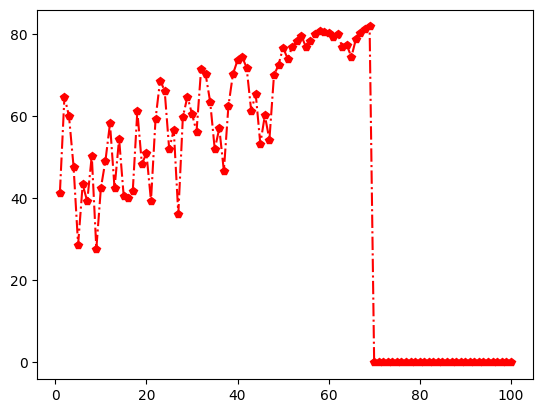

In [ ]:
### Best ###

lr = 500
n_epochs = 100
reg_const = 0.001

### experiment

x = np.linspace(1, n_epochs, n_epochs)
y = np.zeros(n_epochs)

svm_fashion = SVM(n_class_fashion, lr, 1, reg_const)
for epoch in range(n_epochs):
  print("training epoch {}:".format(epoch))
  svm_fashion.train(X_train_fashion, y_train_fashion)
  pred_svm = svm_fashion.predict(X_val_fashion)
  print('The validation accuracy is: %f' % (get_acc(pred_svm, y_val_fashion)))
  y[epoch] = get_acc(pred_svm, y_val_fashion)
  if get_acc(pred_svm, y_val_fashion) > 81.7:
    break

plt.plot(x, y, 'r-.p')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
lr = 5
n_epochs = 100
reg_const = 0.01

### experiment

x = np.linspace(1, n_epochs, n_epochs)
y = np.zeros(n_epochs)

svm_fashion = SVM(n_class_fashion, lr, 1, reg_const)
for epoch in range(n_epochs):
  print("training epoch {}:".format(epoch))
  svm_fashion.train(X_train_fashion, y_train_fashion)
  pred_svm = svm_fashion.predict(X_val_fashion)
  print('The validation accuracy is: %f' % (get_acc(pred_svm, y_val_fashion)))
  y[epoch] = get_acc(pred_svm, y_val_fashion)

plt.plot(x, y, 'r-.p')
plt.show()

training epoch 0:
The training accuracy is 40.716
The validation accuracy is: 41.300000
training epoch 1:
The training accuracy is 52.896
The validation accuracy is: 53.680000
training epoch 2:
The training accuracy is 65.086
The validation accuracy is: 65.080000
training epoch 3:
The training accuracy is 68.518
The validation accuracy is: 68.410000
training epoch 4:
The training accuracy is 70.258
The validation accuracy is: 70.310000
training epoch 5:
The training accuracy is 71.286


KeyboardInterrupt: 

In [ ]:
pred_svm = svm_fashion.predict(X_train_fashion)
print('The training accuracy is given by: %f' % (get_acc(pred_svm, y_train_fashion)))

The training accuracy is given by: 82.584000


### Validate SVM on Fashion-MNIST

In [ ]:
pred_svm = svm_fashion.predict(X_val_fashion)
print('The validation accuracy is given by: %f' % (get_acc(pred_svm, y_val_fashion)))

The validation accuracy is given by: 81.820000


### Test SVM on Fashion-MNIST

In [ ]:
pred_svm = svm_fashion.predict(X_test_fashion)
print('The testing accuracy is given by: %f' % (get_acc(pred_svm, y_test_fashion)))

The testing accuracy is given by: 81.370000


### SVM_Fashion-MNIST Kaggle Submission

Once you are satisfied with your solution and test accuracy output a file to submit your test set predictions to the Kaggle for Assignment 1 Fashion-MNIST. Use the following code to do so:

In [ ]:
output_submission_csv('kaggle/svm_submission_fashion.csv', svm_fashion.predict(X_test_fashion))

## Train SVM on Rice

In [ ]:
### Best ###
lr = 0.5
n_epochs = 100
reg_const = 0.001

svm_RICE = SVM(n_class_RICE, lr, n_epochs, reg_const)
svm_RICE.train(X_train_RICE, y_train_RICE)

Doing binary classification.
The training accuracy is 16.689579323618368
Doing binary classification.
The training accuracy is 33.66327559343782
Doing binary classification.
The training accuracy is 72.55980203464394
Doing binary classification.
The training accuracy is 97.60791861424251
Doing binary classification.
The training accuracy is 99.2209696636422
Doing binary classification.
The training accuracy is 99.79836861882504
Doing binary classification.
The training accuracy is 99.91751443497388
Doing binary classification.
The training accuracy is 99.96333974887727
Doing binary classification.
The training accuracy is 99.98166987443864
Doing binary classification.
The training accuracy is 99.99083493721932
Doing binary classification.
The training accuracy is 99.99083493721932
Doing binary classification.
The training accuracy is 99.99083493721932
Doing binary classification.
The training accuracy is 99.99083493721932
Doing binary classification.
The training accuracy is 99.9908349

In [ ]:
pred_svm = svm_RICE.predict(X_train_RICE)
print('The training accuracy is given by: %f' % (get_acc(pred_svm, y_train_RICE)))

The training accuracy is given by: 100.000000


### Validate SVM on Rice

In [ ]:
pred_svm = svm_RICE.predict(X_val_RICE)
print('The validation accuracy is given by: %f' % (get_acc(pred_svm, y_val_RICE)))

The validation accuracy is given by: 99.917514


## Test SVM on Rice

In [ ]:
pred_svm = svm_RICE.predict(X_test_RICE)
print('The testing accuracy is given by: %f' % (get_acc(pred_svm, y_test_RICE)))

The testing accuracy is given by: 100.000000


# Softmax Classifier (with SGD)

Next, you will train a Softmax classifier. This classifier consists of a linear function of the input data followed by a softmax function which outputs a vector of dimension C (number of classes) for each data point. Each entry of the softmax output vector corresponds to a confidence in one of the C classes, and like a probability distribution, the entries of the output vector sum to 1. We use a cross-entropy loss on this sotmax output to train the model.

Check the following link as an additional resource on softmax classification: http://cs231n.github.io/linear-classify/#softmax

Once again we will train the classifier with SGD. This means you need to compute the gradients of the softmax cross-entropy loss function according to the weights and update the weights using this gradient. Check the following link to help with implementing the gradient updates: https://deepnotes.io/softmax-crossentropy

The softmax classifier has 3 hyperparameters that you can experiment with:
- **Learning rate** - As above, this controls how much the model weights are updated with respect to their gradient.
- **Number of Epochs** - As described for perceptron.
- **Regularization constant** - Hyperparameter to determine the strength of regularization. In this case, we minimize the L2 norm of the model weights as regularization, so the regularization constant is a coefficient on the L2 norm in the combined cross-entropy and regularization objective.

You will implement a softmax classifier using SGD in the **models/softmax.py**

The following code:
- Creates an instance of the Softmax classifier class
- The train function of the Softmax class is trained on the training data
- We use the predict function to find the training accuracy as well as the testing accuracy

## Train Softmax on Fashion-MNIST

In [ ]:
# a = np.array([[1,2,3], [4,5,6]])
# b = a - np.max(a, axis=1, keepdims=True)
# print(b)
# print(np.sum(b, axis=1, keepdims=True))
# print(b / np.sum(b, axis=1, keepdims=True))

c = np.array([1,2,3,4,5]).reshape([-1,1])
c = np.append(-c,c,axis=1)
print(c)
print(np.argmax(c, axis=1))
print(c[1][0])


[[-1  1]
 [-2  2]
 [-3  3]
 [-4  4]
 [-5  5]]
[1 1 1 1 1]
-2


training epoch 0:
The training accuracy is 36.53
The validation accuracy is: 36.930000
training epoch 1:
The training accuracy is 32.766
The validation accuracy is: 32.460000
training epoch 2:
The training accuracy is 36.403999999999996
The validation accuracy is: 36.900000
training epoch 3:
The training accuracy is 28.471999999999998
The validation accuracy is: 27.680000
training epoch 4:
The training accuracy is 30.962
The validation accuracy is: 31.370000
training epoch 5:
The training accuracy is 40.932
The validation accuracy is: 40.590000
training epoch 6:
The training accuracy is 38.99
The validation accuracy is: 39.540000
training epoch 7:
The training accuracy is 34.748000000000005
The validation accuracy is: 33.940000
training epoch 8:
The training accuracy is 41.815999999999995
The validation accuracy is: 42.140000
training epoch 9:
The training accuracy is 35.221999999999994
The validation accuracy is: 34.670000
training epoch 10:
The training accuracy is 48.077999999999996

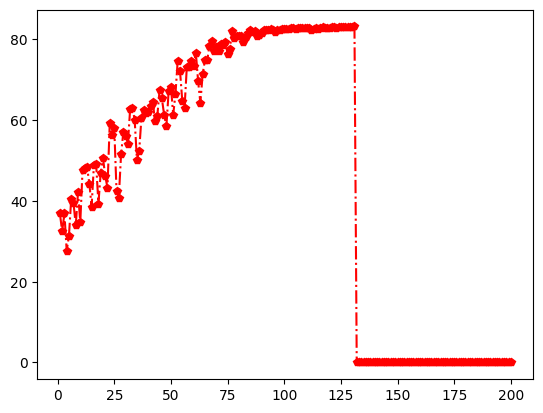

In [ ]:
### Best ###

lr = 700
n_epochs = 200
reg_const = 0.001

### experiment
import matplotlib.pyplot as plt

x = np.linspace(1, n_epochs, n_epochs)
y = np.zeros(n_epochs)

softmax_fashion = Softmax(n_class_fashion, lr, 1, reg_const)
for epoch in range(n_epochs):
  print("training epoch {}:".format(epoch))
  softmax_fashion.train(X_train_fashion, y_train_fashion)
  pred_softmax = softmax_fashion.predict(X_val_fashion)
  print('The validation accuracy is: %f' % (get_acc(pred_softmax, y_val_fashion)))
  y[epoch] = get_acc(pred_softmax, y_val_fashion)
  if get_acc(pred_softmax, y_val_fashion) > 83.2:
    break

plt.plot(x, y, 'r-.p')
plt.show()

training epoch 0:
The training accuracy is 36.608000000000004
The validation accuracy is: 36.910000
training epoch 1:
The training accuracy is 55.17999999999999
The validation accuracy is: 55.030000
training epoch 2:
The training accuracy is 53.1
The validation accuracy is: 53.420000
training epoch 3:
The training accuracy is 59.102
The validation accuracy is: 58.900000
training epoch 4:
The training accuracy is 62.388
The validation accuracy is: 61.980000
training epoch 5:
The training accuracy is 64.044
The validation accuracy is: 63.220000
training epoch 6:
The training accuracy is 66.01
The validation accuracy is: 65.460000
training epoch 7:
The training accuracy is 66.45
The validation accuracy is: 65.910000
training epoch 8:
The training accuracy is 63.798
The validation accuracy is: 63.790000
training epoch 9:
The training accuracy is 66.712
The validation accuracy is: 66.530000
training epoch 10:
The training accuracy is 72.066
The validation accuracy is: 71.750000
training epo

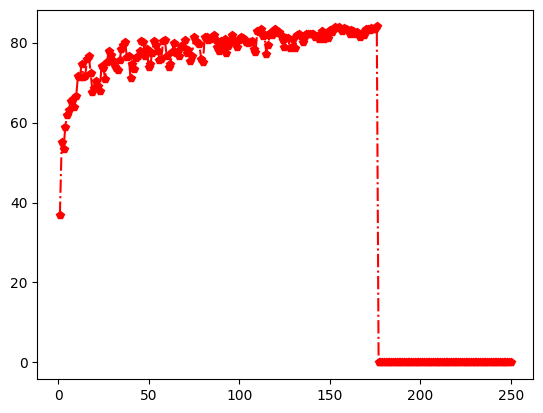

In [79]:
### Best: lr=3, reg=0.001
lr = 3.5
n_epochs = 250
reg_const = 0.001

### experiment
import matplotlib.pyplot as plt

x = np.linspace(1, n_epochs, n_epochs)
y = np.zeros(n_epochs)

softmax_fashion = Softmax(n_class_fashion, lr, 1, reg_const)
for epoch in range(n_epochs):
  print("training epoch {}:".format(epoch))
  softmax_fashion.train(X_train_fashion, y_train_fashion)
  pred_softmax = softmax_fashion.predict(X_val_fashion)
  print('The validation accuracy is: %f' % (get_acc(pred_softmax, y_val_fashion)))
  y[epoch] = get_acc(pred_softmax, y_val_fashion)
  if get_acc(pred_softmax, y_val_fashion) >= 84:
    break

plt.plot(x, y, 'r-.p')
plt.show()

In [78]:
print(np.max(y))

83.82


In [80]:
pred_softmax = softmax_fashion.predict(X_train_fashion)
print('The training accuracy is given by: %f' % (get_acc(pred_softmax, y_train_fashion)))

The training accuracy is given by: 84.958000


### Validate Softmax on Fashion-MNIST

In [81]:
pred_softmax = softmax_fashion.predict(X_val_fashion)
print('The validation accuracy is given by: %f' % (get_acc(pred_softmax, y_val_fashion)))

The validation accuracy is given by: 84.020000


### Testing Softmax on Fashion-MNIST

In [82]:
pred_softmax = softmax_fashion.predict(X_test_fashion)
print('The testing accuracy is given by: %f' % (get_acc(pred_softmax, y_test_fashion)))

The testing accuracy is given by: 83.030000


### Softmax_Fashion-MNIST Kaggle Submission

Once you are satisfied with your solution and test accuracy output a file to submit your test set predictions to the Kaggle for Assignment 1 Fashion-MNIST. Use the following code to do so:

In [ ]:
output_submission_csv('kaggle/softmax_submission_fashion.csv', softmax_fashion.predict(X_test_fashion))

## Train Softmax on Rice

In [ ]:
### Best ###

lr = 0.005
n_epochs = 50
reg_const = 0.001

softmax_RICE = Softmax(n_class_RICE, lr, n_epochs, reg_const)
softmax_RICE.train(X_train_RICE, y_train_RICE)

Doing binary classification.
The training accuracy is 90.83493721931995
The training accuracy is 90.82577215653927
The training accuracy is 90.81660709375859
The training accuracy is 90.81660709375859
The training accuracy is 90.81660709375859
The training accuracy is 90.80744203097791
The training accuracy is 90.80744203097791
The training accuracy is 90.79827696819723
The training accuracy is 90.79827696819723
The training accuracy is 90.79827696819723
The training accuracy is 90.79827696819723
The training accuracy is 90.79827696819723
The training accuracy is 90.79827696819723
The training accuracy is 90.79827696819723
The training accuracy is 90.78911190541655
The training accuracy is 90.78911190541655
The training accuracy is 90.78911190541655
The training accuracy is 90.78911190541655
The training accuracy is 90.78911190541655
The training accuracy is 90.78911190541655
The training accuracy is 90.78911190541655
The training accuracy is 90.78911190541655
The training accuracy is 

In [ ]:
pred_softmax = softmax_RICE.predict(X_train_RICE)
print('The training accuracy is given by: %f' % (get_acc(pred_softmax, y_train_RICE)))

The training accuracy is given by: 90.770782


### Validate Softmax on Rice

In [ ]:
pred_softmax = softmax_RICE.predict(X_val_RICE)
print('The validation accuracy is given by: %f' % (get_acc(pred_softmax, y_val_RICE)))

The validation accuracy is given by: 90.046742


### Testing Softmax on Rice

In [ ]:
pred_softmax = softmax_RICE.predict(X_test_RICE)
print('The testing accuracy is given by: %f' % (get_acc(pred_softmax, y_test_RICE)))

The testing accuracy is given by: 92.273852


# Logistic Classifier

The Logistic Classifier has 2 hyperparameters that you can experiment with:
- **Learning rate** - similar to as defined above in Perceptron, this parameter scales by how much the weights are changed according to the calculated gradient update.
- **Number of Epochs** - As described for perceptron.
- **Threshold** - The decision boundary of the classifier.


You will implement the Logistic Classifier in the **models/logistic.py**

The following code:
- Creates an instance of the Logistic classifier class
- The train function of the Logistic class is trained on the training data
- We use the predict function to find the training accuracy as well as the testing accuracy

### Training Logistic Classifer

In [ ]:
a = np.array([[1,2,3],[4,5,6]])
print(1/(1+np.exp(a)))

[[0.26894142 0.11920292 0.04742587]
 [0.01798621 0.00669285 0.00247262]]


In [ ]:
### Best ###
learning_rate = 0.5
n_epochs = 10
threshold = 0.5

lr = Logistic(learning_rate, n_epochs, threshold)
lr.train(X_train_RICE, y_train_RICE)

/content/drive/MyDrive/CS444/assignment1/models/logistic.py:30: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


The training accuracy is 69.36119512418661
The training accuracy is 66.07093758592247
The training accuracy is 70.65346897626249
The training accuracy is 71.1483823664192
The training accuracy is 94.83090459169645
The training accuracy is 97.59875355146183
The training accuracy is 99.20263953808085
The training accuracy is 99.2209696636422
The training accuracy is 98.90935752909907
The training accuracy is 97.20465585189258


In [ ]:
pred_lr = lr.predict(X_train_RICE)
print('The training accuracy is given by: %f' % (get_acc(pred_lr, y_train_RICE)))

The training accuracy is given by: 97.204656


### Validate Logistic Classifer

In [ ]:
pred_lr = lr.predict(X_val_RICE)
print('The validation accuracy is given by: %f' % (get_acc(pred_lr, y_val_RICE)))

The validation accuracy is given by: 97.360462


### Test Logistic Classifier

In [ ]:
pred_lr = lr.predict(X_test_RICE)
print('The testing accuracy is given by: %f' % (get_acc(pred_lr, y_test_RICE)))

The testing accuracy is given by: 97.360462
